
# Project: Investigate a Dataset - [Now-Show-Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Our data to investigate is no show appointments or (missed) appointments in some neighborhoods in Brazil, where the appointment took place. We have 14 columns in our dataset, which refers to the below:

- PatientID, patient id recorded in the system.
- AppointmentID, appointment code.
- Gender, patient sex.
- ScheduledDay, the registeration day via call for example.
- AppointmentDay, the day when the patient supposed to visit.
- Age, the age of patient.
- Neighbourhood, the place where the visit is supposed to be taken in.
- Scholarship, the "*Bolsa Familia*" governmental welfare program, it shows the patient enrollment status to this program (0 for not enrolled, 1 for enrolled) 
- Hipertension, the status of patient diagnosed with (0 for negative, 1 for positive)
- Diabetes, the status of patient diagnosed with (0 for negative, 1 for positive)
- Alcoholism, the status of patient diagnosed with (0 for negative, 1 for positive)
- Handcap, the status of patient diagnosed with (0 for negative, 1 for positive)
- SMS_received, the patient received how many messages from the neighborhood (1,2,3,4)
- No-show, if the patient attended his appointment or not taking into the consideration the encoding here (No for attended, Yes for absent)


### Question(s) for Analysis
  - Which more, the missed or attended appointments
  - Which month is the most frequent one in both sides, the absence and attendance
  - Which day is the most frequent one in both sides, the absence and attendance
  - Are enrolled patients in Bolsa Familia program the most attended or the vice versa
  - Which gender that took the Brazilian welfare care among the neighborhoods
  - Is there any relation between receiving SMS and showing in hospitals, by how?
  - Which diagnosis occupy the high population in *Bolsa Familia* program
  - What is the diagnosis of patients who keen to attend their appointments
  - What is the average age patients enrolled or not_enrolled, and What is the diagnosis for this age
  - What is the range of time gap, and which period is the peak
  - Which gender is suffering from each diagnosis
  - What are the most frequent (crowded) Neighborhood, top 3
  - Is there any correlation between age and being diagnosed by specific disease
  - What diagnosis that need more concentration from government, and in Which neighborhood

In [1]:
'''importing the necessary libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling:

## Gathering


In [2]:
'''upload the csv file to read'''
show_stats= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

'''Check that the file is well-imported.'''
show_stats.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


## Assessing


In [3]:
'''know the dimension of data we have'''
show_stats.shape

(110527, 14)

In [4]:
'''To have couple of samples of the dataset'''
show_stats.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
97635,9.865199e+13,5700460,F,2016-05-16T09:28:22Z,2016-06-07T00:00:00Z,59,SANTO ANTÔNIO,0,0,0,0,0,1,No
55914,9.444243e+11,5640909,F,2016-04-29T11:41:53Z,2016-05-13T00:00:00Z,30,SANTO ANDRÉ,0,0,0,0,0,0,Yes
80373,7.313832e+12,5681722,F,2016-05-10T15:01:21Z,2016-05-12T00:00:00Z,56,MONTE BELO,0,0,0,0,0,0,No
230,5.954780e+14,5572635,F,2016-04-12T10:59:06Z,2016-04-29T00:00:00Z,52,ANDORINHAS,0,0,1,0,0,1,No
65481,5.813384e+11,5670493,F,2016-05-06T13:53:31Z,2016-05-06T00:00:00Z,13,JARDIM CAMBURI,0,0,0,0,0,0,No
84436,4.815581e+12,5713970,F,2016-05-18T11:03:34Z,2016-06-06T00:00:00Z,63,REPÚBLICA,0,0,0,0,0,1,No
79818,4.117440e+12,5646982,F,2016-05-02T12:22:47Z,2016-05-02T00:00:00Z,79,ILHA DAS CAIEIRAS,0,1,0,0,0,0,Yes
89840,5.479313e+13,5739083,F,2016-05-25T12:35:18Z,2016-06-02T00:00:00Z,56,JARDIM CAMBURI,0,0,0,0,0,1,No
28942,1.299999e+13,5714307,F,2016-05-18T11:42:16Z,2016-05-19T00:00:00Z,19,ROMÃO,0,0,0,0,0,0,No
18965,9.838636e+13,5698013,F,2016-05-16T07:09:33Z,2016-05-16T00:00:00Z,47,CRUZAMENTO,0,0,0,0,0,0,No


In [5]:
'''Illustrate the type of each column data'''
show_stats.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
'''To display a concise summary of the dataframe,including the number of non-null values in each column'''
show_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There is no missing data in the whole dataframe, which is pretty clean as a first observation

In [7]:
'''Return the number of unique values in each column to eliminate any repetition of entried data'''
show_stats.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

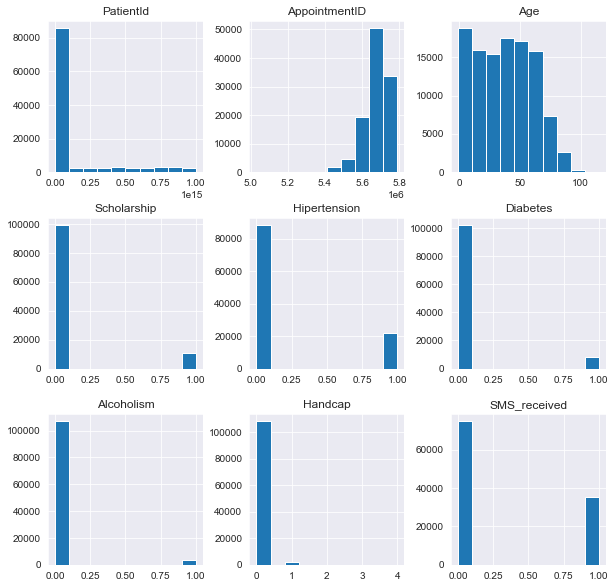

In [8]:
'''Have an overall look at all the columns data'''
show_stats.hist(figsize=(10,10));

In [9]:
'''Returning some useful descriptive statistics for each column of the whole dataset,to detect the tidiness or quality issues'''
show_stats.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
'''Filtering the age with the max to have a close look, checking the quality (validity) issue'''
show_stats[show_stats['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


- Only two people with that high age, which can be kept
as it's valid to the world schema in a country as Brazil

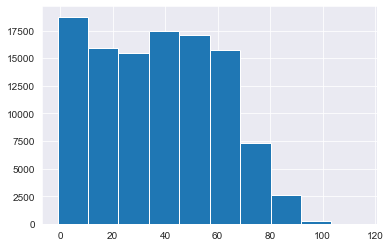

In [11]:
'''Distinguish the Age range in the dataset we have'''
show_stats['Age'].hist();

In [12]:
'''Slicing the Age column to detect invalid data'''
show_stats[show_stats.Age<=0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [13]:
'''Printing the unique neighbourhood to observe if there is any quality (consistency) issue'''
for i in show_stats.Neighbourhood.unique():
    print([i])

['JARDIM DA PENHA']
['MATA DA PRAIA']
['PONTAL DE CAMBURI']
['REPÚBLICA']
['GOIABEIRAS']
['ANDORINHAS']
['CONQUISTA']
['NOVA PALESTINA']
['DA PENHA']
['TABUAZEIRO']
['BENTO FERREIRA']
['SÃO PEDRO']
['SANTA MARTHA']
['SÃO CRISTÓVÃO']
['MARUÍPE']
['GRANDE VITÓRIA']
['SÃO BENEDITO']
['ILHA DAS CAIEIRAS']
['SANTO ANDRÉ']
['SOLON BORGES']
['BONFIM']
['JARDIM CAMBURI']
['MARIA ORTIZ']
['JABOUR']
['ANTÔNIO HONÓRIO']
['RESISTÊNCIA']
['ILHA DE SANTA MARIA']
['JUCUTUQUARA']
['MONTE BELO']
['MÁRIO CYPRESTE']
['SANTO ANTÔNIO']
['BELA VISTA']
['PRAIA DO SUÁ']
['SANTA HELENA']
['ITARARÉ']
['INHANGUETÁ']
['UNIVERSITÁRIO']
['SÃO JOSÉ']
['REDENÇÃO']
['SANTA CLARA']
['CENTRO']
['PARQUE MOSCOSO']
['DO MOSCOSO']
['SANTOS DUMONT']
['CARATOÍRA']
['ARIOVALDO FAVALESSA']
['ILHA DO FRADE']
['GURIGICA']
['JOANA D´ARC']
['CONSOLAÇÃO']
['PRAIA DO CANTO']
['BOA VISTA']
['MORADA DE CAMBURI']
['SANTA LUÍZA']
['SANTA LÚCIA']
['BARRO VERMELHO']
['ESTRELINHA']
['FORTE SÃO JOÃO']
['FONTE GRANDE']
['ENSEADA DO SUÁ']
['SA

In [14]:
'''Groupby the data counts based on SMS_received, and Handcap values_counts'''
show_stats.groupby('SMS_received')['Handcap'].value_counts()

SMS_received  Handcap
0             0          73340
              1           1553
              2            140
              3             10
              4              2
1             0          34946
              1            489
              2             43
              3              3
              4              1
Name: Handcap, dtype: int64

- Pretty obvious that the column values are swapped with each other since the dataset built to show
how many messages sent to the patient in SMS_received column


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [15]:
'''Copying the original dataset to apply the cleaning process on'''
show_stats_clean=show_stats.copy()
'''Check if changes are applied'''
show_stats_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


- Copying the dataset to be able to apply any changes for the sake of cleaning it.

In [16]:
'''Make one criteria in the whole dataset columns names to be lowercased for easy going-through'''
show_stats_clean.rename(columns= lambda x: x.strip().lower(), inplace=True)

In [17]:
'''Rename the columns with the right spelling and eliminate any complications,
 taking into the consideration that we need to replace the handicap column with sms_received as the values are swapped'''

show_stats_clean.rename(columns={'patientid':'patient_id',
                              'appointmentid':'appointment_id',
                              'scheduledday':'scheduled_day',
                              'appointmentday':'appointment_day',
                              'scholarship':'welfare_program',
                              'hipertension':'hypertension',
                              'handcap':'sms_received',
                              'no-show':'no_show',
                              'neighbourhood':'neighborhood',
                              'sms_received':'handicap'}, inplace=True)

In [18]:
'''Check the changes'''
show_stats_clean.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,welfare_program,hypertension,diabetes,alcoholism,sms_received,handicap,no_show


In [19]:
'''Check that the values of handicap are in the right column name'''
show_stats_clean.sms_received.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: sms_received, dtype: int64

- Change the columns names with standariozed, right spelled, in place (reverse the name of each swapped "sms_received" with "handicap") at once for clear interpretation

In [20]:
'''Converting the 0s,and -1 in age column to be nan'''
show_stats_clean.age=show_stats_clean.age.replace([0,-1],np.nan)

In [21]:
'''Drop the null records'''
show_stats_clean.dropna(inplace=True)

In [22]:
'''There should be none of the null amounts'''
show_stats_clean.isnull().sum().any()

False

In [23]:
'''Dropping the new index, and reset the placed one'''
show_stats_clean.reset_index(drop=True,inplace=True)

- Replace all ages <= 0 with nan to be excluded from our dataset
- Change the index of our rows after excluding the wrong ages records

In [24]:
'''Replace the column and positive value of hypertension column with the diagnosis name for further analysis'''
show_stats_clean['hypertension'].replace({1:'hypertension', 0: np.nan}, inplace=True)

In [25]:
'''Replace the column and positive value of diabetes column with the diagnosis name for further analysis'''
show_stats_clean['diabetes'].replace({1:'diabetes', 0: np.nan}, inplace=True)

In [26]:
'''Replace the column and positive value of alcoholism column with the diagnosis name for further analysis'''
show_stats_clean['alcoholism'].replace({1:'alcoholism', 0: np.nan}, inplace=True)

In [27]:
'''Replace the column and positive value of handicap column with the diagnosis name for further analysis'''
show_stats_clean['handicap'].replace({1:'handicap', 0: np.nan}, inplace=True)

In [28]:
'''Rename the values of governmental welfare to strings as enrolled or not_enrolled'''
show_stats_clean['welfare_program'].replace({1:'enrolled', 0:'not_enrolled'},inplace=True)

- Rename the values of our data columns to be more consistent for further analysis, and convert the 0s of diseases to NaN to be dropped easily from our records

In [29]:
'''We need to melt the three columns in one column "Diagnosis" to be able to drop the 0 amounts at once'''
show_stats_clean= pd.melt(show_stats_clean, id_vars=['patient_id','appointment_id','gender','scheduled_day','appointment_day','age',
                                                     'neighborhood','welfare_program','sms_received','no_show'],
                                                     var_name='disease_type',
                                                     value_name='diagnosis')

In [30]:
'''Overall look'''
show_stats_clean.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,welfare_program,sms_received,no_show,disease_type,diagnosis
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,not_enrolled,0,No,hypertension,hypertension
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,not_enrolled,0,No,hypertension,NaN
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,not_enrolled,0,No,hypertension,NaN


In [31]:
show_stats_clean.dropna(inplace=True)
show_stats_clean.reset_index(drop=True, inplace=True)

In [32]:
show_stats_clean.shape

(67689, 12)

In [33]:
show_stats_clean.diagnosis.unique()

array(['hypertension', 'diabetes', 'alcoholism', 'handicap'], dtype=object)

- Melt the four columns of diseases type in one column, and their values in another column as "diagnosis", which leads to generate more rows in our columns and will be handled.
Also, we dropped the 0s values that we converted to NaN in the previous step

In [34]:
'''Check if there is duplicated appointment_id'''
show_stats_clean[show_stats_clean.appointment_id.duplicated()]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,welfare_program,sms_received,no_show,disease_type,diagnosis
21801,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,not_enrolled,0,No,diabetes,diabetes
21802,7.298459e+13,5637975,F,2016-04-29T07:35:19Z,2016-04-29T00:00:00Z,63.0,SÃO CRISTÓVÃO,not_enrolled,0,No,diabetes,diabetes
21803,1.578132e+12,5637986,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64.0,TABUAZEIRO,enrolled,0,No,diabetes,diabetes
21805,2.741649e+11,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78.0,SÃO CRISTÓVÃO,not_enrolled,0,Yes,diabetes,diabetes
21806,5.894585e+11,5633116,F,2016-04-28T08:51:26Z,2016-04-29T00:00:00Z,39.0,MARUÍPE,not_enrolled,0,No,diabetes,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...
67664,2.586717e+12,5746688,M,2016-05-30T14:23:10Z,2016-06-06T00:00:00Z,49.0,RESISTÊNCIA,not_enrolled,0,No,handicap,handicap
67666,6.338837e+14,5701786,F,2016-05-16T11:00:12Z,2016-06-06T00:00:00Z,39.0,RESISTÊNCIA,not_enrolled,0,No,handicap,handicap
67670,3.227475e+11,5763322,F,2016-06-02T08:49:21Z,2016-06-07T00:00:00Z,76.0,RESISTÊNCIA,not_enrolled,0,No,handicap,handicap
67673,9.278752e+12,5678369,F,2016-05-10T08:25:25Z,2016-06-06T00:00:00Z,80.0,RESISTÊNCIA,not_enrolled,0,No,handicap,handicap


- Here, we've noticed that there are duplicated rows for the same appointment_id generated as a result of metling the four disease values in another column

In [35]:
'''Take a sample to check why is there still duplicated visits for the same patient'''
show_stats_clean[show_stats_clean.appointment_id==5635414]


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,welfare_program,sms_received,no_show,disease_type,diagnosis
11,2.741649e+11,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78.0,SÃO CRISTÓVÃO,not_enrolled,0,Yes,hypertension,hypertension
21805,2.741649e+11,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78.0,SÃO CRISTÓVÃO,not_enrolled,0,Yes,diabetes,diabetes


- The paient at the same visit time has been diagnosed with more than one diagnosis, inthis case(hypertension, diabetes) 

In [36]:
'''Now we shall drop the disease_type since we have all its records in the diagnosis column'''
show_stats_clean.drop(['disease_type'],axis=1,inplace=True)

In [37]:
'''Have a look to any unvalidity diagnosis based on the world schema
people under < or = 18 cannot be alcoholic as per the legal drinking age in Brazil'''
show_stats_clean.query('age <= 18 & diagnosis=="alcoholism"' ).count()

patient_id         28
appointment_id     28
gender             28
scheduled_day      28
appointment_day    28
age                28
neighborhood       28
welfare_program    28
sms_received       28
no_show            28
diagnosis          28
dtype: int64

- Around 30 patients are under the legal age of drinking alcohol, which is an absolute world schema invalidity to be diagnosed as alcoholic

In [38]:
'''Drop the alcoholic 18 or below from the records'''
show_stats_clean=show_stats_clean.drop(show_stats_clean[(show_stats_clean['age']<= 18) & (show_stats_clean['diagnosis'] == 'alcoholism')].index)
show_stats_clean.reset_index(drop=True , inplace=True)

In [39]:
'''Check the changes'''
show_stats_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67661 entries, 0 to 67660
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       67661 non-null  float64
 1   appointment_id   67661 non-null  int64  
 2   gender           67661 non-null  object 
 3   scheduled_day    67661 non-null  object 
 4   appointment_day  67661 non-null  object 
 5   age              67661 non-null  float64
 6   neighborhood     67661 non-null  object 
 7   welfare_program  67661 non-null  object 
 8   sms_received     67661 non-null  int64  
 9   no_show          67661 non-null  object 
 10  diagnosis        67661 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.7+ MB


In [40]:
'''Get sample to check'''
show_stats_clean.sample()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,welfare_program,sms_received,no_show,diagnosis
20069,2.118672e+12,5725845,F,2016-05-20T12:03:08Z,2016-06-08T00:00:00Z,41.0,GURIGICA,not_enrolled,0,Yes,hypertension


- Exclude the invalid data of alcoholic underage patients from our set

In [41]:
'''Change the dtype of the columns'''

'''Slicing patient_id to eliminate the last two characters'''
show_stats_clean.patient_id= show_stats_clean.patient_id.astype('str').str[:-2].str.strip()

'''Change the type of appointment_id to be object'''
show_stats_clean.appointment_id= show_stats_clean.appointment_id.astype('str').str.strip()

'''Change the type of age to be integer'''
show_stats_clean.age= show_stats_clean.age.astype('int64')



In [42]:
'''Change the dtype of the scheduled day, and appointment day to be date'''
show_stats_clean['scheduled_day']= pd.to_datetime(show_stats_clean['scheduled_day']).dt.tz_localize(None)
show_stats_clean['appointment_day']= pd.to_datetime(show_stats_clean['appointment_day']).dt.tz_localize(None)

In [43]:
'''Check the dtypes to make sure they're clear now'''
show_stats_clean.dtypes

patient_id                 object
appointment_id             object
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighborhood               object
welfare_program            object
sms_received                int64
no_show                    object
diagnosis                  object
dtype: object

- Change the data types of the columns with the proper type. scheduled, appointment_id to be datetime to access them easily furthermore age to be integer 

In [44]:
'''Add a column with the difference in time between both the scheduled and appointment day,
and eliminate the -1 to 0 instead of dropping their values, as it might be just an error.'''
show_stats_clean['time_gap']= (show_stats_clean['appointment_day']- show_stats_clean['scheduled_day']).dt.days
show_stats_clean['time_gap'].replace(-1,0, inplace=True)

In [45]:
'''Extract the day name of the appointment_day
as it it's the one which we build our analysis on'''
show_stats_clean['day_of_week']=show_stats_clean['appointment_day'].dt.day_name()

In [46]:
'''Extract the month name for further illustrations'''
show_stats_clean['month_of_year']=show_stats_clean['appointment_day'].dt.month_name()

In [47]:
'''Check the changes and the type of them at the same time'''
show_stats_clean.dtypes

patient_id                 object
appointment_id             object
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighborhood               object
welfare_program            object
sms_received                int64
no_show                    object
diagnosis                  object
time_gap                    int64
day_of_week                object
month_of_year              object
dtype: object

- Add three columns:
Time gap, which represents the waiting period between the scheduled day and appointment day, and it's preferrable not to lose the data of -1 days, and it can be replaced with 0, as it could be just mistyping..

   Day of week, which represents the day name of appointment day
Month of year, which represents the month name of appointment day

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which more, the missed or attended appointments)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


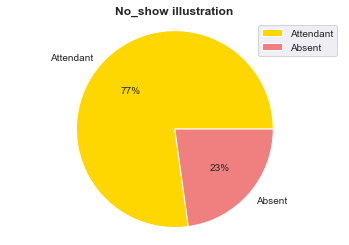

In [48]:
'''The majority of the attendence illustration'''
labels=['Attendant', 'Absent']
colors = [ 'gold', 'lightcoral']
x=show_stats_clean['no_show'].value_counts()
figsize=(8,8)
plt.pie(x=x, autopct='%1.0f%%', colors=colors, labels=labels)
plt.title('No_show illustration', weight='bold')
plt.legend()
plt.axis('equal');


- Majority of patients attended their appointments, 77%

### Research Question 2 (Which month is the most frequent one in both sides, the absence and attendance)

In [49]:
'''Save the categorization of each value in no_show column record to separate value for eady access'''
Yes= show_stats_clean['no_show']=='Yes'
No= show_stats_clean['no_show']=='No'

In [50]:
'''Define a function to be applied on one or more columns that show the frequency based on a specific column to analyze'''
def plot_hist(col):
    plt.figure(figsize=(6,6))
    show_stats_clean[col][No].hist(alpha=1, color=['pink'], label='Attendance')
    show_stats_clean[col][Yes].hist(alpha=0.9, color=['purple'], label='Absence')
    plt.xticks(rotation=30)
    plt.ylabel('frequency'.title(), fontsize=12, weight='bold')
    plt.xlabel('{}'.format(col).title(), fontsize=12, weight='bold')
    plt.title('frequency based on {}'.format(col).title(),fontsize=10, weight='bold')
    plt.legend();

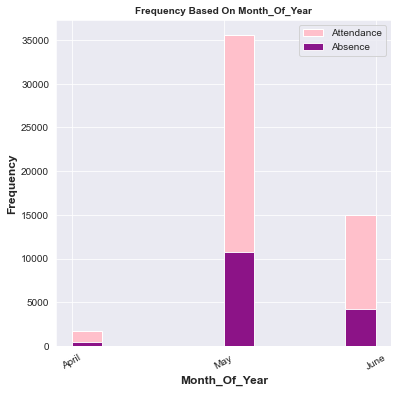

In [51]:
plot_hist('month_of_year')

- The most frequent month is May throughout the second quarter of 2016

### Research Question 3 (Which day is the most frequent one in both sides, the absence and attendance)

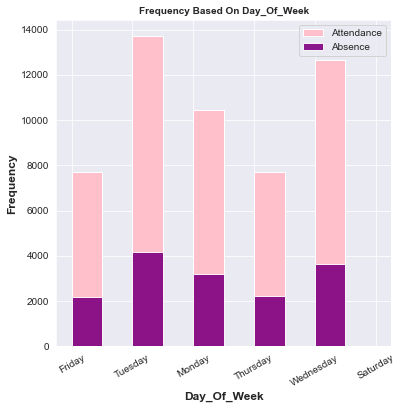

In [52]:
plot_hist('day_of_week')

- Tuesday, and Wednesday are the top days in the patients appointments

### Research Question 4 (Are enrolled patients in Bolsa Familia program the most attended or the vice versa)

In [53]:
'''Observe the majority of patinets welfare program enrollment status'''
pd.DataFrame(show_stats_clean.welfare_program.value_counts())

,welfare_program
not_enrolled,61193
enrolled,6468


- The majority of our population is not enrolled to the governmental program.

In [54]:
'''percentage of patients enrolled and not enrolled based on some gender and no_show'''
count_welfare=show_stats_clean.groupby('welfare_program').no_show.value_counts(normalize=True)
count_gender=show_stats_clean.groupby('welfare_program').gender.value_counts(normalize=True)


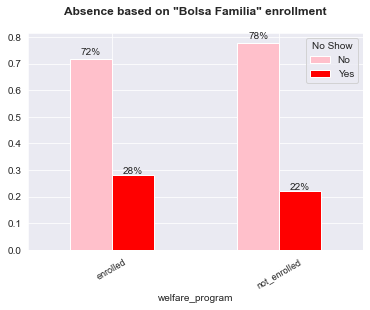

In [55]:
''' We can have a better visualized conclusion of the percentage of enrolled attended patients and vice versa'''
prop_enrollment=count_welfare.unstack().plot(kind='bar', color=['pink','red']);
for p in prop_enrollment.patches:
    width= p.get_width()
    height= p.get_height()
    x,y= p.get_xy()
    plt.xticks(rotation=30, fontsize=9)
    plt.legend(title='No Show')
    plt.title('Absence based on "Bolsa Familia" enrollment\n', weight='bold')
    prop_enrollment.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')


- Here, we can conduct two points:

 - Patients aren't enrolled in Bolsa Familia welfare program in Brazil are the high amount of patients in neighborhoods.
 
 - They attended in neighborhoods more than the enrolled ones.

### Research Question 5  (Which gender that took the Brazilian welfare care among the neighborhoods)

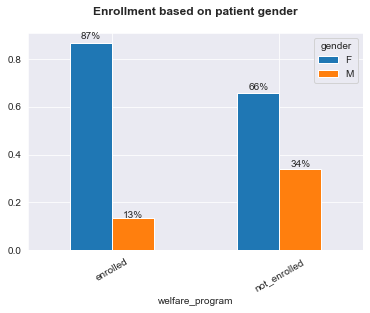

In [56]:
'''We can visualize the percentage of enrolled/ not_enrolled patients based on the gender'''
prop_gender=count_gender.unstack().plot(kind='bar');
for p in prop_gender.patches:
    width= p.get_width()
    height= p.get_height()
    plt.xticks(rotation=30)
    x,y= p.get_xy()
    plt.title('Enrollment based on patient gender\n', weight='bold')
    prop_gender.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

- The majority of patients that took the care of Brazilian governmental program are females.

### Research Question 6  (Has receiving SMS anything to do with showing/attending in neighborhood, by how?)

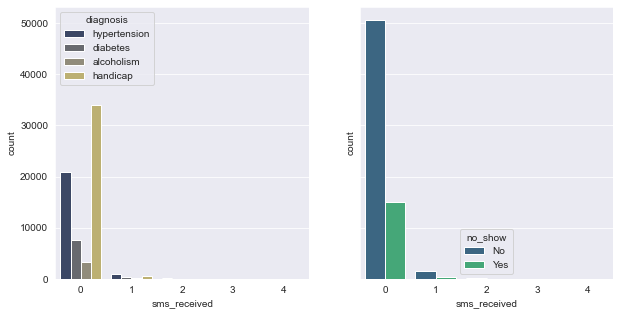

In [57]:
'''We can build subplots at once to conduct wide observation, sms_receive by diagnosis, and sms_received by no_show'''
fig, (ax1,ax2)=plt.subplots(ncols=2, sharey=True)
sns.countplot(x='sms_received', data=show_stats_clean, hue='diagnosis', ax=ax1, palette='cividis')
sns.countplot(x='sms_received', data=show_stats_clean, hue='no_show', ax=ax2, palette='viridis')
fig.set_figwidth(10)
fig.set_figheight(5)


- It's quite obvious that receiving sms does not make any big difference to help patients attend their appointments
- The patients diagnosed with Hypertension are slightly received one message than the other diagnosis 

### Research Question 7  (Which diagnosis occupy the high population in Bolsa Familia program)

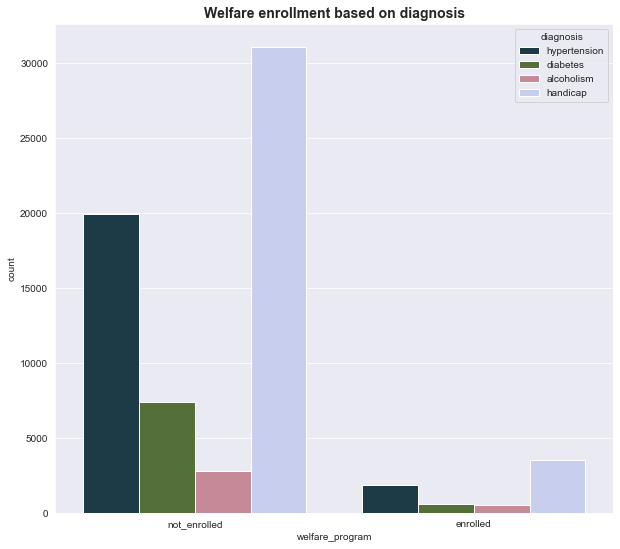

In [58]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
figsize=(8,8)
plt.title('Welfare enrollment based on diagnosis', fontsize=14, weight='bold')
sns.countplot(x='welfare_program',data=show_stats_clean, hue='diagnosis', ax=ax1, palette='cubehelix');
fig.set_figwidth(10)
fig.set_figheight(9)

- Patients records that diagnosed with Handicap occupy the highest percentage on both levels, enrolled and not enrolled to the program of governmental welfare, which makes pretty sense since this a high cost treatment for the handicapped patients or even their families. 

### Research Question 8  (What is the diagnosis of patients who keen to attend their appointments)

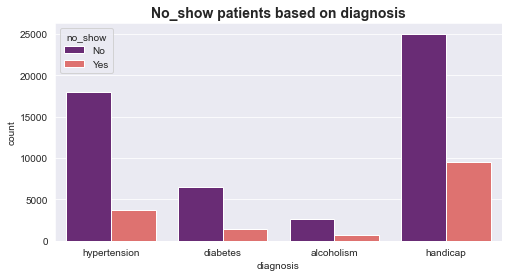

In [59]:
'''Plotting the count'''
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
sns.countplot(x='diagnosis', data=show_stats_clean, hue='no_show', ax=ax1, palette='magma');
plt.title('No_show patients based on diagnosis', fontsize=14, weight='bold')
fig.set_figwidth(8)
fig.set_figheight(4)

- Patients diagnosed with handicap and hypertension, were the most keen to attend in all over appointments

### Research Question 9  (What is the average age patients enrolled or not_enrolled, What is the diagnosis for this age)

In [60]:
'''Groupby the welfare_program and diagnosis,
to be able to get the mean age for each'''
mean_age=show_stats_clean.groupby(['diagnosis', 'welfare_program'])['age'].mean().unstack()

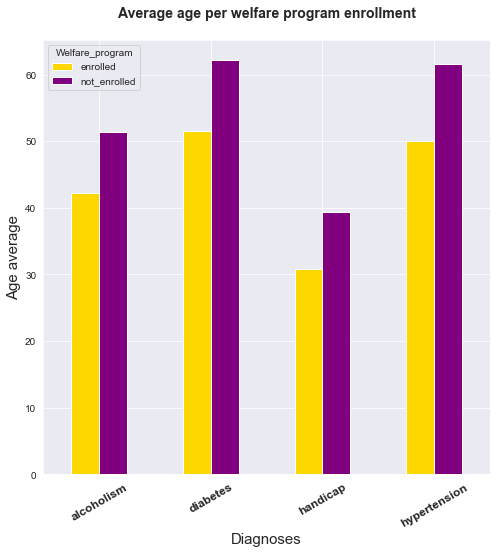

In [61]:
'''Find the average by visual'''
mean_age.plot(kind='bar',color=['gold', 'purple'], figsize=(8,8))
plt.title('Average age per welfare program enrollment\n',fontsize=14, weight='bold')
plt.xticks(weight='bold', fontsize=12, rotation=30)
plt.ylabel('Age average', fontsize=15)
plt.xlabel('Diagnoses', fontsize=15)
plt.legend(title='Welfare_program');


- The average age among population for enrolled diabetic and hypertensed patients are almost near, 65, 63 years old
- The average age for not_enrolled patients were almost 53 and diagnosed by diabetes, and 50 years old with hypertension

### Research Question 10  (What was the range of time gap, and which period is the peak )

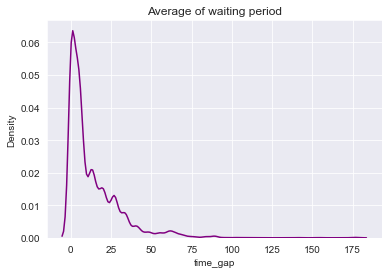

In [62]:
'''We can get the density plot of the time gap'''
sns.kdeplot(x='time_gap',data=show_stats_clean, color='purple')
plt.title('Average of waiting period');

- The majority of waiting period was between 0 to a month

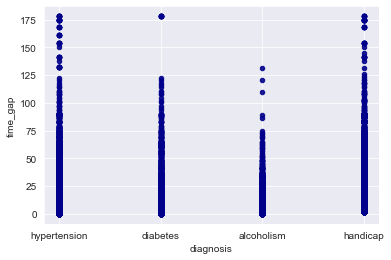

In [63]:
'''Plotting the scatter between waiting period of each diagnosis'''
show_stats_clean.plot.scatter(x='diagnosis', y='time_gap', color='Darkblue', alpha=0.9);

- Hypertension patients can be hold for very long time to take the proper needed service, same as Handicap, which is needed to be addressed to the decision makers for enhancing the service

### Research Question 11  (Which gender is suffering from each diagnosis)

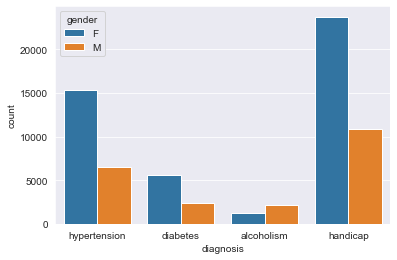

In [64]:
'''Plotting the count'''
sns.countplot(x='diagnosis', hue='gender', data=show_stats_clean);

- In all kinds of diagnosis, the female patients are suffering more than the male ones, except the "alcoholism" diagnosis, male patients were higher in appointments

### Research Question 12  (What are the most frequent (crowded) Neighborhood, top 5)

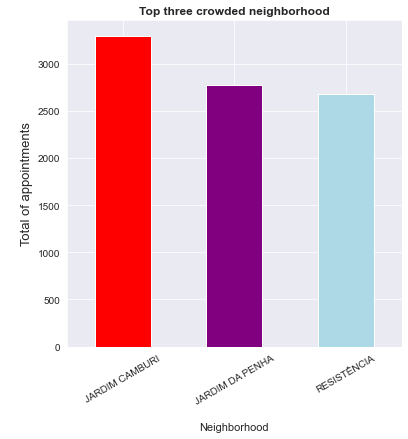

In [65]:
ax=show_stats_clean['neighborhood'].value_counts()[:3]
ax.plot(kind='bar',figsize=(6,6), color=['red','purple','lightblue'])
plt.xticks(rotation=30);
plt.ylabel('\nTotal of appointments', fontsize=13)
plt.xlabel('\nNeighborhood', fontsize=11)
plt.title('Top three crowded neighborhood', weight='bold');

- Here, we got the top three neighborhoods in Brazil that were crowded with number of appointments, the most frequent one is "JARDIM CAMBURI" neighborhood

### Research Question 13  (What diagnosis that need more concentration from government, and in Which neighborhood)

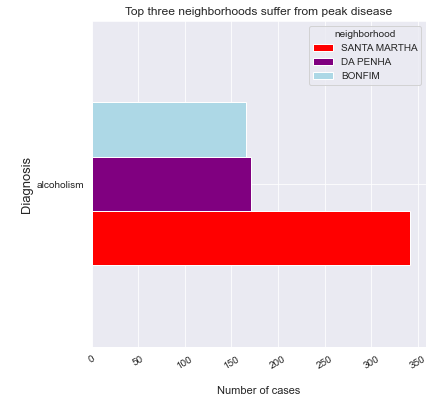

In [66]:
n_d=show_stats_clean.groupby(['diagnosis'])['neighborhood'].value_counts()[:3].unstack()
n_d
n_d.plot(kind='barh',figsize=(6,6), color=['red','purple','lightblue'])
plt.xticks(rotation=30);
plt.ylabel('\nDiagnosis', fontsize=13)
plt.xlabel('\nNumber of cases', fontsize=11)
plt.title('Top three neighborhoods suffer from peak disease');


- Alcoholism is the most common diganosis in "SANTA MARTHA" neighborhood with number of cases near to 350.
<!-- which leads to put some special restrictions in this neighborhood, to limit the at least for upcoming generations not to drink alcoholic drinks -->

### Research Question 14  (Is there any correlation between age and being diagnosed by specific disease)

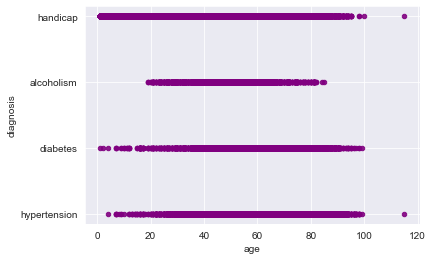

In [67]:
show_stats_clean.plot.scatter(x='age', y='diagnosis', color='purple', alpha=0.9);

- Hypertension, and diabetes patients are easily get diagnosed with them by age/time, note to say that hyper and diabetic young patient can get it as it's inborn disease.

- Alcoholism patients scope/range is getting tight by age.
- Handicap is more common in young age, because of the nature of it, and it's almost stable.

In [68]:
'''Conclude the diagnosis of age 115 we have in our dataset'''
show_stats_clean.query('age==115')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,welfare_program,sms_received,no_show,diagnosis,time_gap,day_of_week,month_of_year
19380,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,not_enrolled,0,No,hypertension,14,Friday,June
62165,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,not_enrolled,0,No,handicap,14,Friday,June


- Patient is suffering from two high risk diseases, Hypertension and Handicap which can be taken into the health ministry consideration

In [69]:
'''Save changes in a csv file for any further analysis'''
show_stats_clean.to_csv('show_stats_clean.csv', index=False)

<a id='conclusions'></a>
## Conclusions

- We have (77%) of whole valid populations have attended their appointments, (23%) missed their appointments in neighborhoods.
- The peak month in the records of first quarter of 2016, is (May) on both levels, absence and attendance.
- The peak two days are Tuesday, and then Wednesday, that the patients were frequenting to the neighborhoods on.
- Number of enrolled patients in *Bolsa Familia* Brazilian welfare program are almost (90%) from the population, not_enrolled around (10%)
- (78%) from not_enrolled patients attended the appointments in neighborhoods, (22%) didn't.
- (72%) of enrolled patients attended the appointments, and 28% missed.
- (87%) of enrolled patients are females, and (13%) males.
(66%) of not_enrolled patients are females as well, but (34%) are males.
- There SMS till (4) messages supposed to be sent to the patients, but after digging into the data, sending messages has nothing to do with making patients attending their appointments
- Handicap in the top diagnosis among all patients records, and on both levels (enrolled, not_enrolled to welfare program)
- The majority of patients were diagnosed with Handicap, and Hypertension.
- The highest average age of not_enrolled, diabetic patients is (65) years old.
- The average age of Hypertensed patients is (63) and they were not enrolled to *Bolsa Familia*
- The frequent waiting period range falls in the period of (0 to a 30 days).
- Female patients are suffeting from (Handicap), not to mention that femal patients are suffering more than males in all kind of diagnosis, except (Alcoholism) males are suffering from it more than femals.
- Top three crowded neighborhoods are (JARDIM CAMBURI, JARDIM DA PENCHA, and RESISTENCIA)
- Most of (SANTA MARTHA, DA PENHA, BONFIM) neighborhoods are recieving high frequent cases of (Alcoholism), SANTA MARTHA receives aroung (350) cases
- We can obviously notice that (Hypertension, Diabetes) are common in the old age.
## Suggestions
- It's preferrable to stop the service of sending SMS messages, as it does not play almost any role in making patients attending their appointments.
- Ministry of health shall put some restrictions in (SANTA MARTHA) neiborhood to limit it
- We can suggest to enroll (SÃO JOSÉ) with patient ID to the governmental welfare care, especially that he's suffering from Hypertension along with Handicap
- The waiting period for Hypertension and Handicap patients can be hold for really long time, which there must be a way to enhance the service, may be Brazilian ministry can offer any health care in house.






### Limitations
**Tidiness issues:**
- There're four columns of diseases can with positive or negative value for each patient, these can be in one column "Diagnosis".

**Quality issues:**

*Accuracy issues*
- There're mistyping of columns names
- ScheduledDay, and AppointmentDay should be as datetime format
- PatiendID and AppointmentID should be string (object)
- Scholarship column should be renamed with "Welfare_program", for more interpretation
- Handcap has values from 1 to 4 which is definitely swapped with the values of sms_received as the values of it are only 0 and 1

*Completeness issues:*
- The time of scheduled day is missing, and it's been replaced by 00:00:00 which shall be ignored/excluded
- There was not any null values, but by digging into details, it was just ages missing so the data entry it by only 0

*Validity issues:*
- Age has <= 0 amounts, which should be dropped
- Patients age <= 18 ( the legal age of drink alcohol in Brazil ) should be dropped
- Some dates of scheduled day column were registered after the appointment day, which caused time gap(waiting period) invalid with negative values

*Consistency issues:*
- There were not any severe consistency issues observed in the dataset

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1